In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import utils
import featurizer
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import classify

CALIBRATION_FILE = "N_matrix_trial9.mat"
TEST_FOLDER = "test/"
TEST_FILE = TEST_FOLDER + "/sliding11.txt"

/Users/Can/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
#First we need to featurize the experiment.
df = utils.process_data_files(TEST_FILE, CALIBRATION_FILE)
df_segs = featurizer.segment(df)
print len(df_segs)

test_data = []
for df_seg in df_segs:
    test_data.append(featurizer.featurize(df_seg))
print len(test_data)
print test_data[0].shape

Index([u'time', u'Right Leg Pos', u'Left Leg Pos', u'Commanded Right Leg Pos',
       u'Commanded Left Leg Pos', u'DCR', u'DCL', u'GyroX', u'GyroY', u'GyroZ',
       u'AX', u'AY', u'AZ', u'RBEMF', u'LBEMF', u'VBatt', u'S1', u'S2', u'S3',
       u'S4', u'S5', u'S6', u'S7', u'S8'],
      dtype='object')
38
38
(70,)


In [5]:
#Random Forest Prediction

random_forest_predictions = classify.predict_random_forests(test_data)



Running Random Forests...
CTL size: 117 ACT size: 99
10-fold CV Acc Mean:  0.939567099567 Scores:  [ 0.86363636  0.90909091  1.          1.          0.95454545  0.90909091
  0.95454545  0.95238095  0.95238095  0.9       ]
OOB score: 0.935185185185
Feature Importances:
[('Fy_energy', 0.0013164165789455009), ('Mz_skew', 0.0016874100393228988), ('Mz_entropy', 0.0017138141706634705), ('Mx_skew', 0.0019318927463916164), ('M_mag_std', 0.001936588855440952), ('My_skew', 0.0019596036522393574), ('Fy_kurtosis', 0.0021314786017369259), ('Fz_max', 0.0022473841793627324), ('AX_std', 0.0022962383282203024), ('Fz_skew', 0.002338898784596232), ('Fz_entropy', 0.0025255567295921337), ('Fz_kurtosis', 0.0025324548667103254), ('F_mag_kurtosis', 0.0026185995937706573), ('AX_min', 0.002709063350833677), ('AX_mean', 0.0029072520676783732), ('Fx_energy', 0.0029578372580200208), ('My_entropy', 0.0030024068744695116), ('F_mag_skew', 0.003253955617765304), ('M_mag_kurtosis', 0.0032792765643523229), ('Fx_max', 0

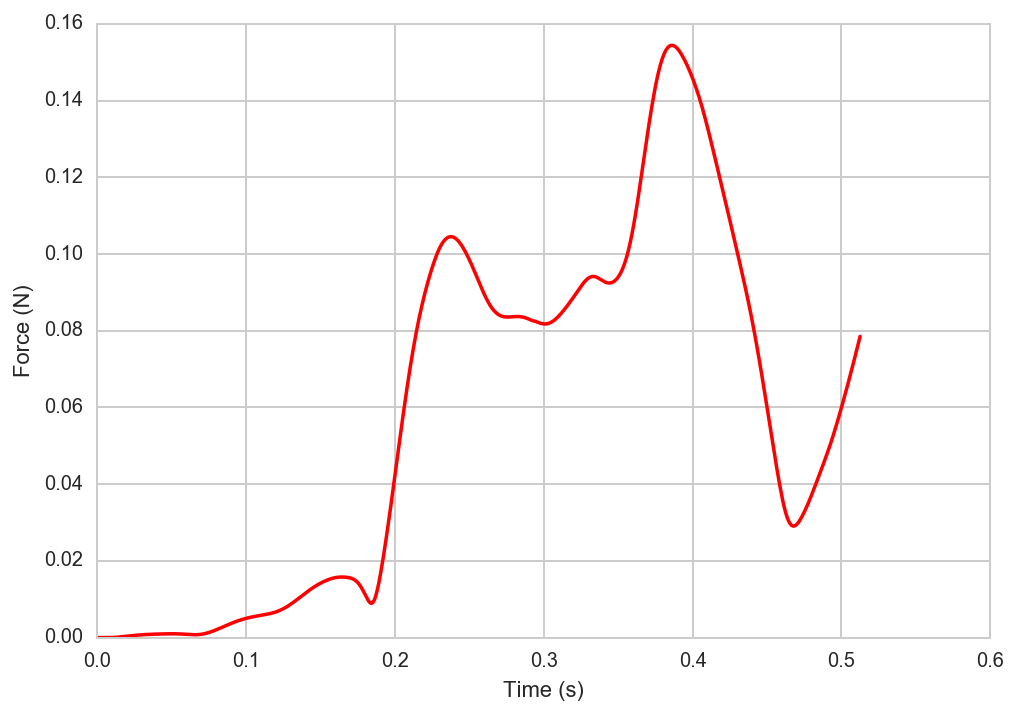

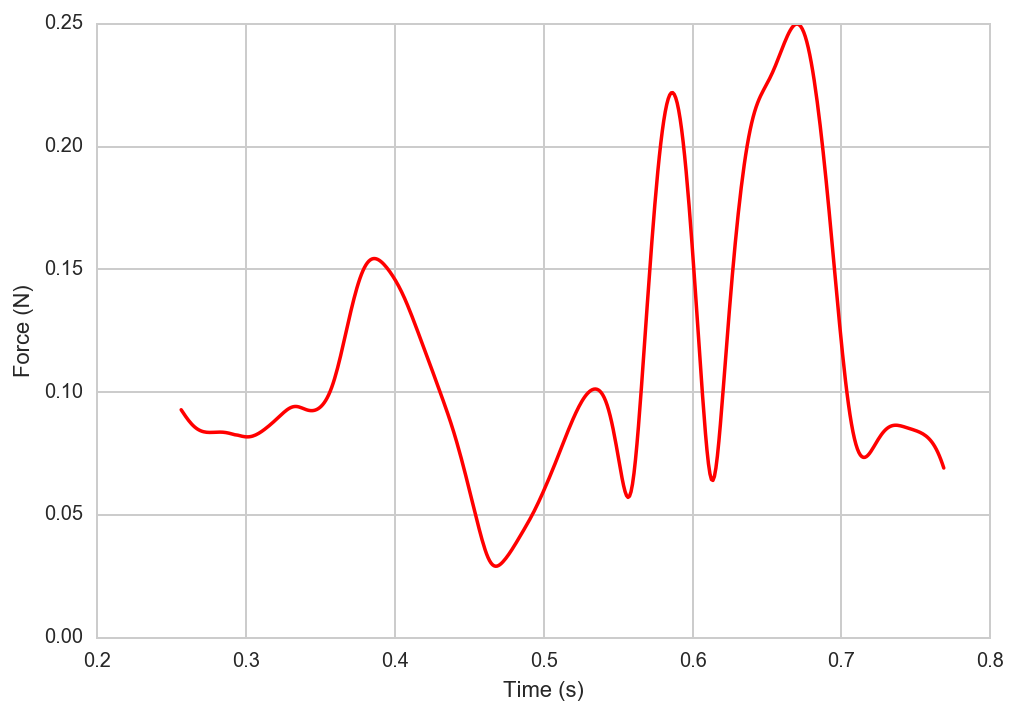

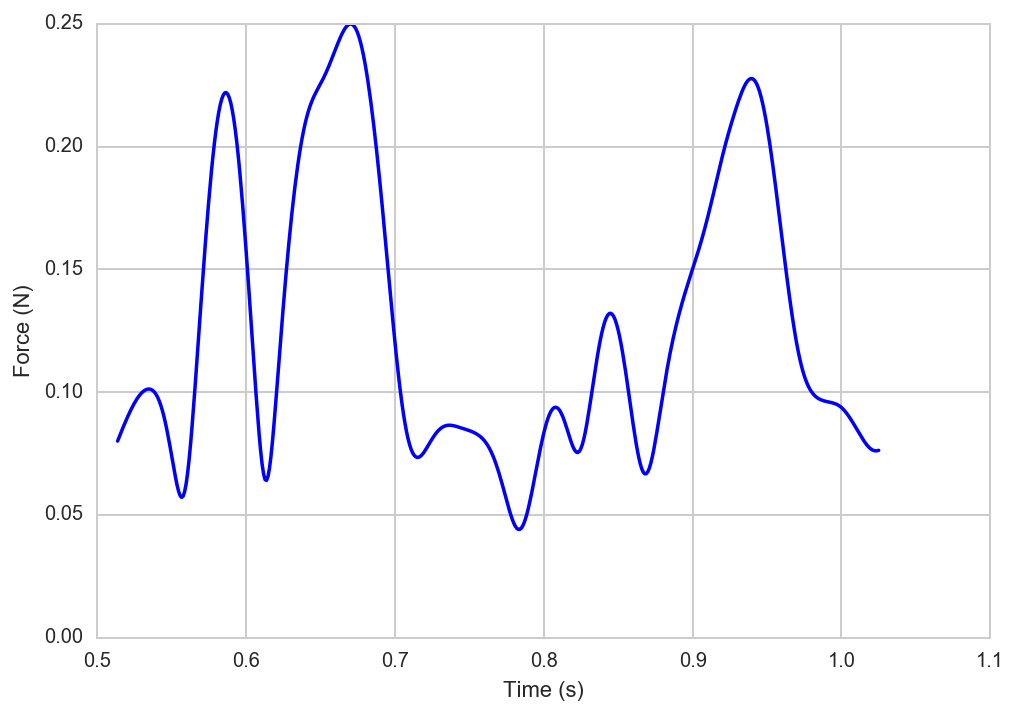

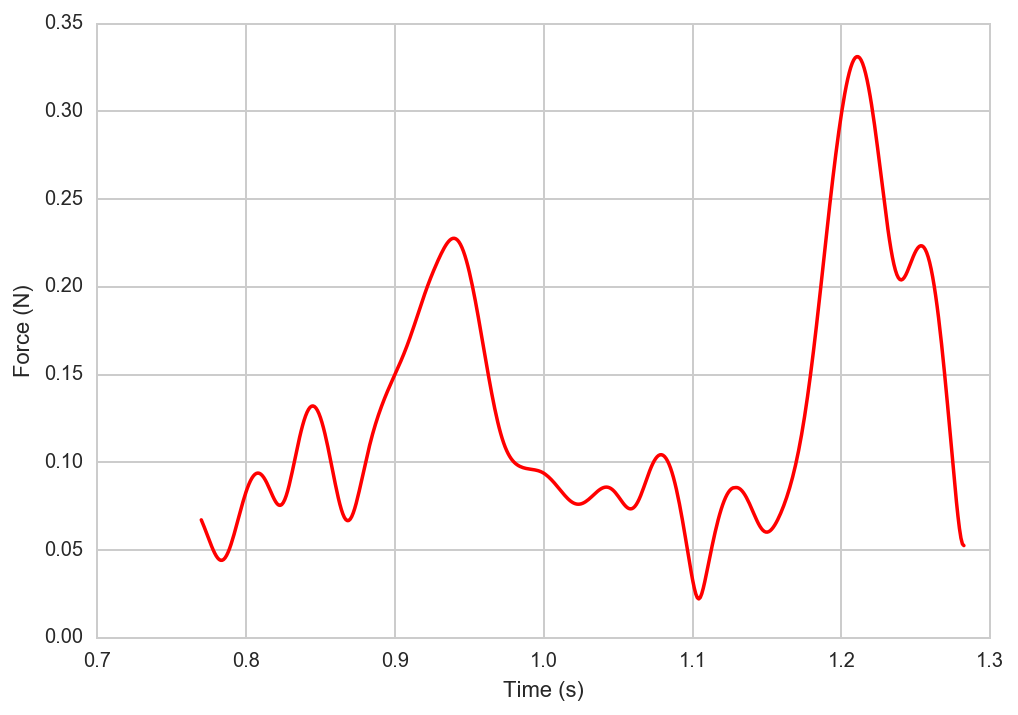

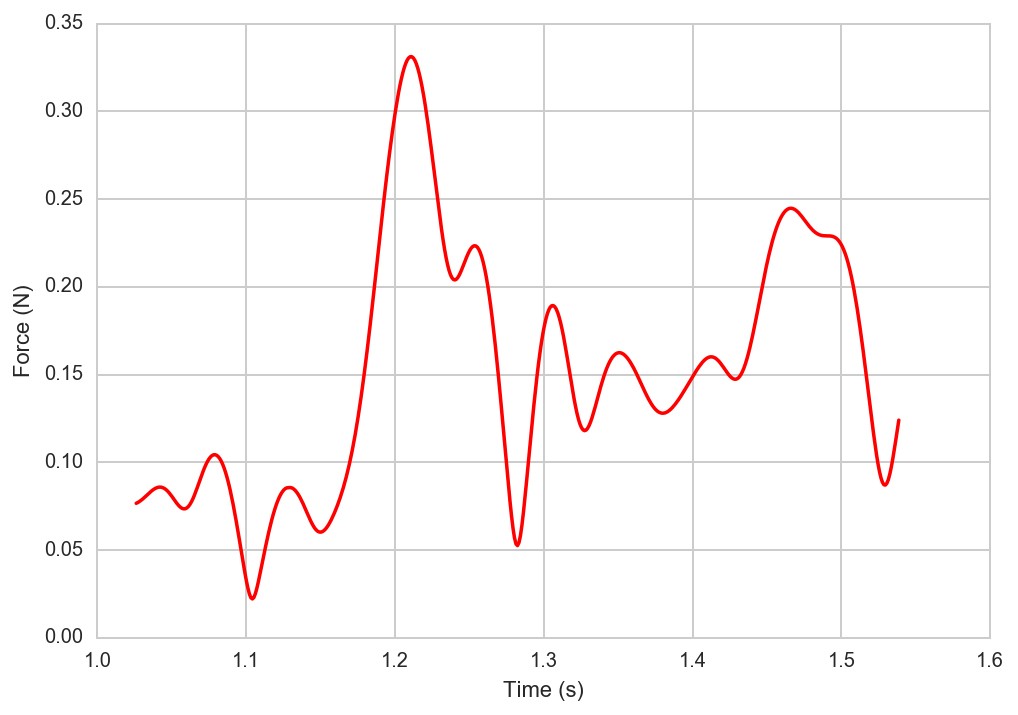

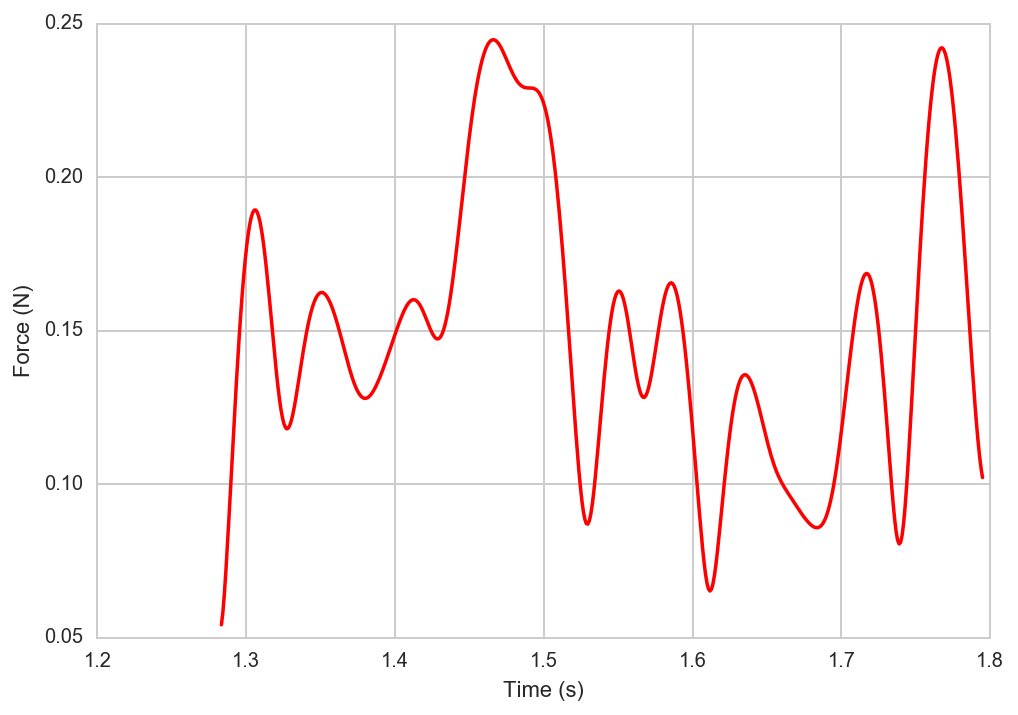

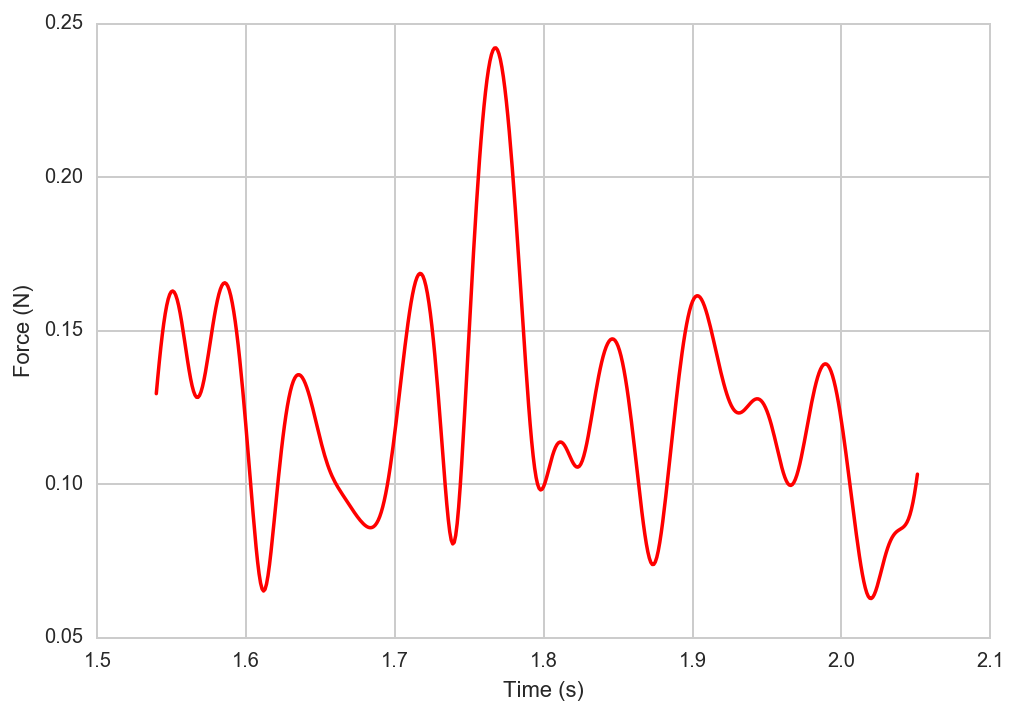

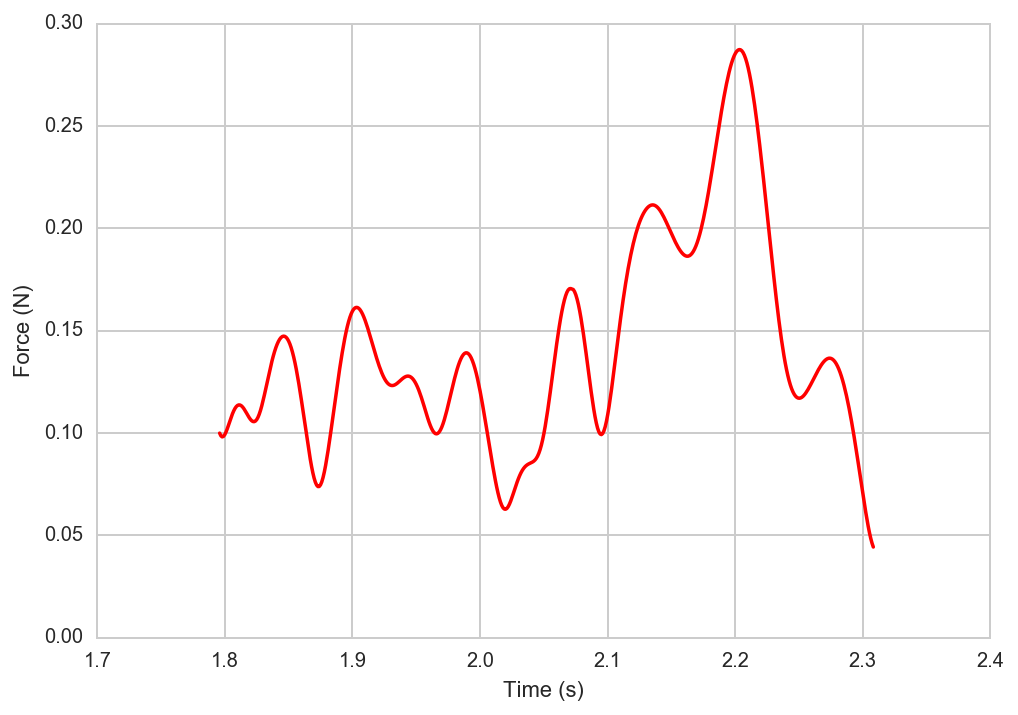

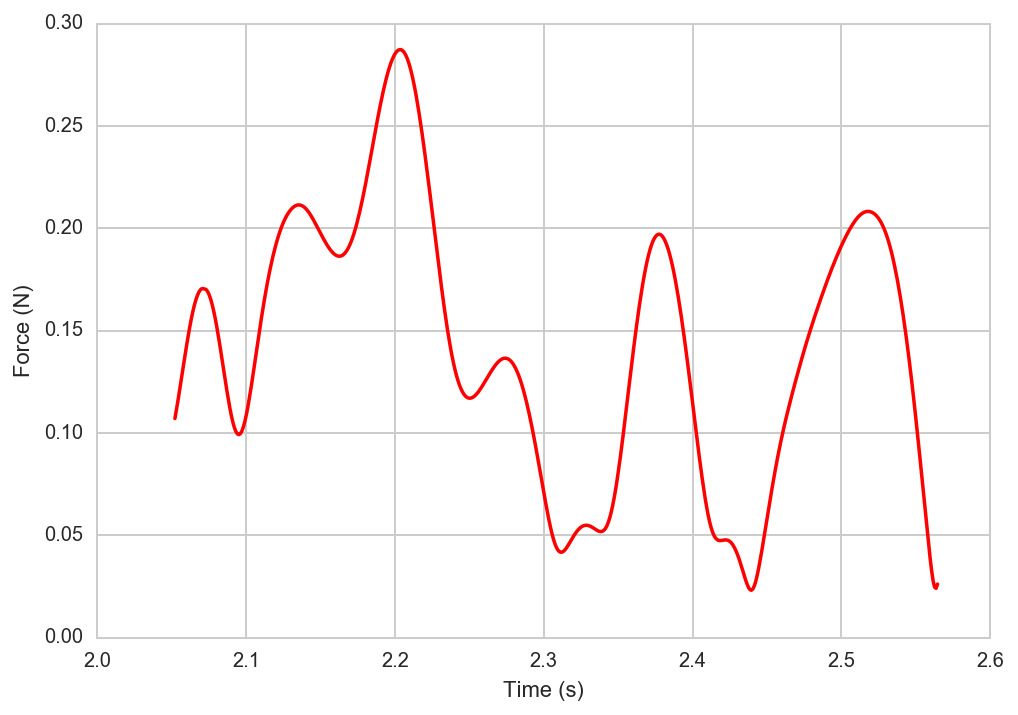

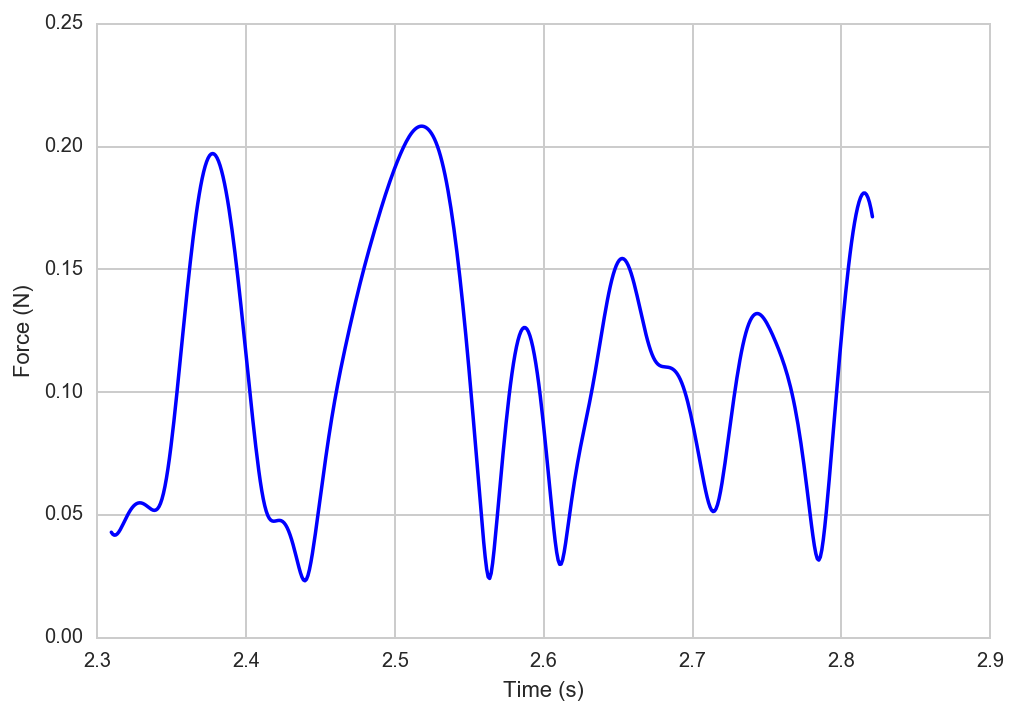

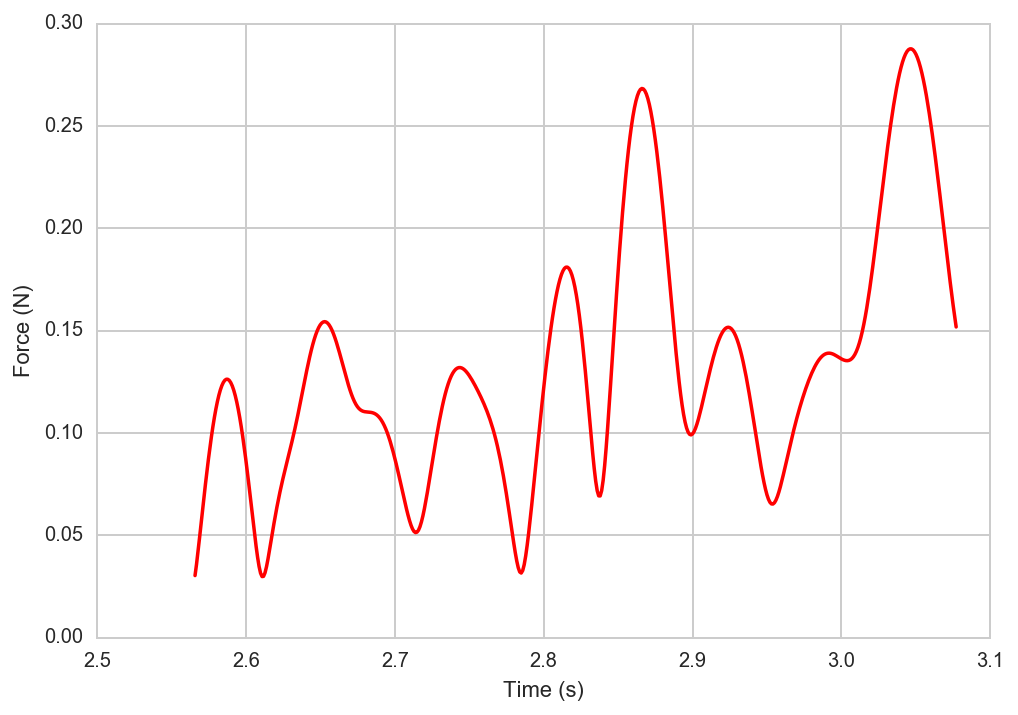

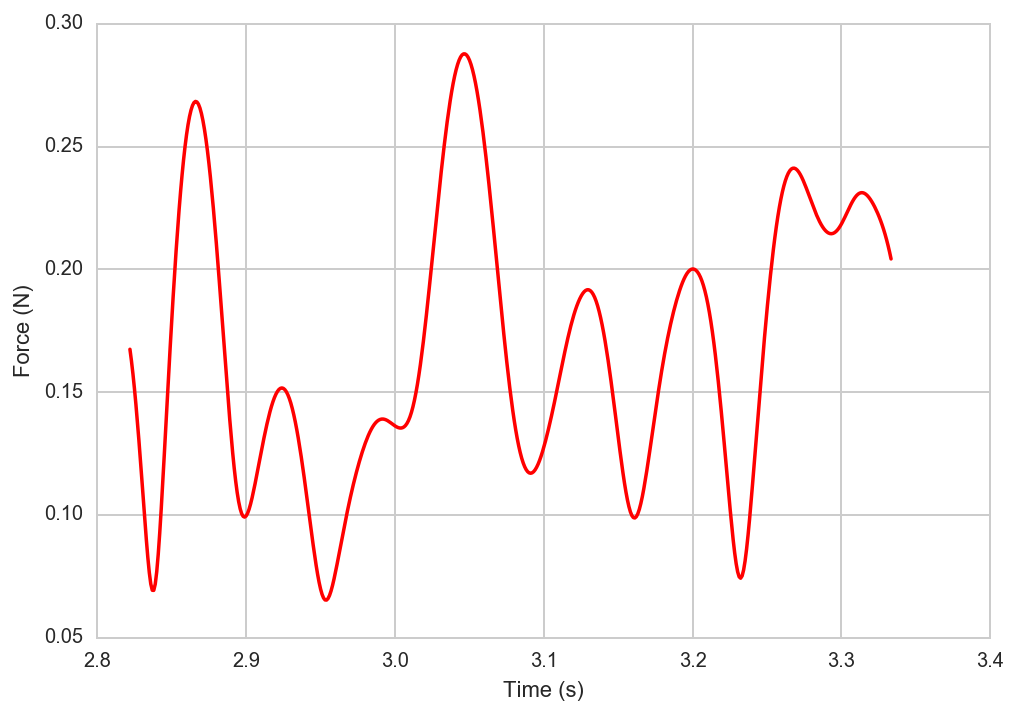

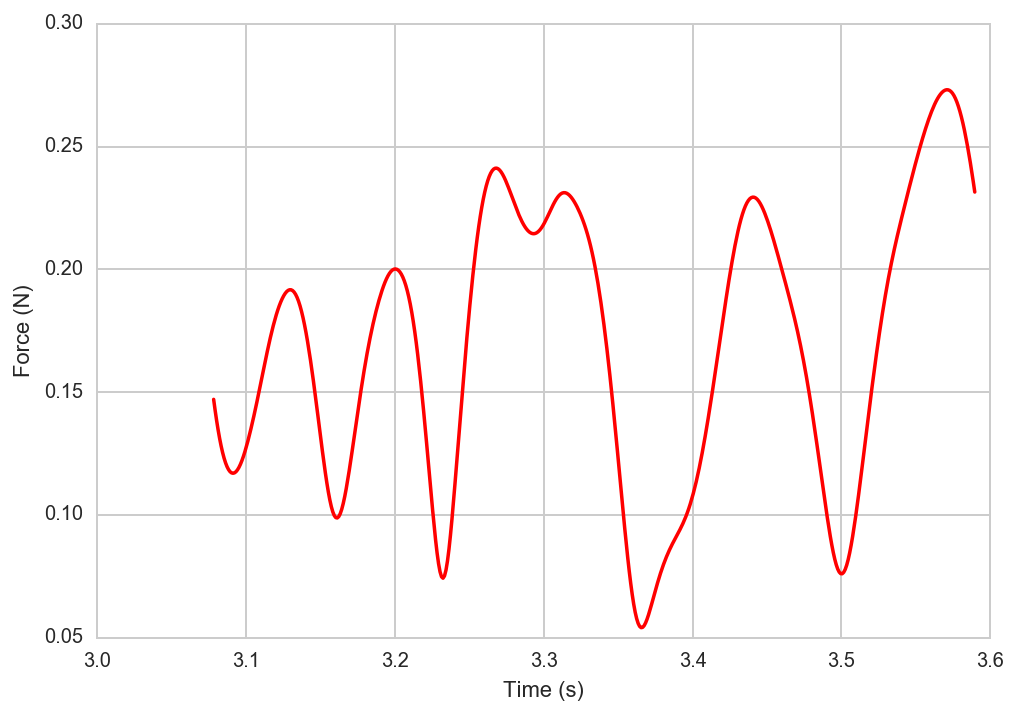

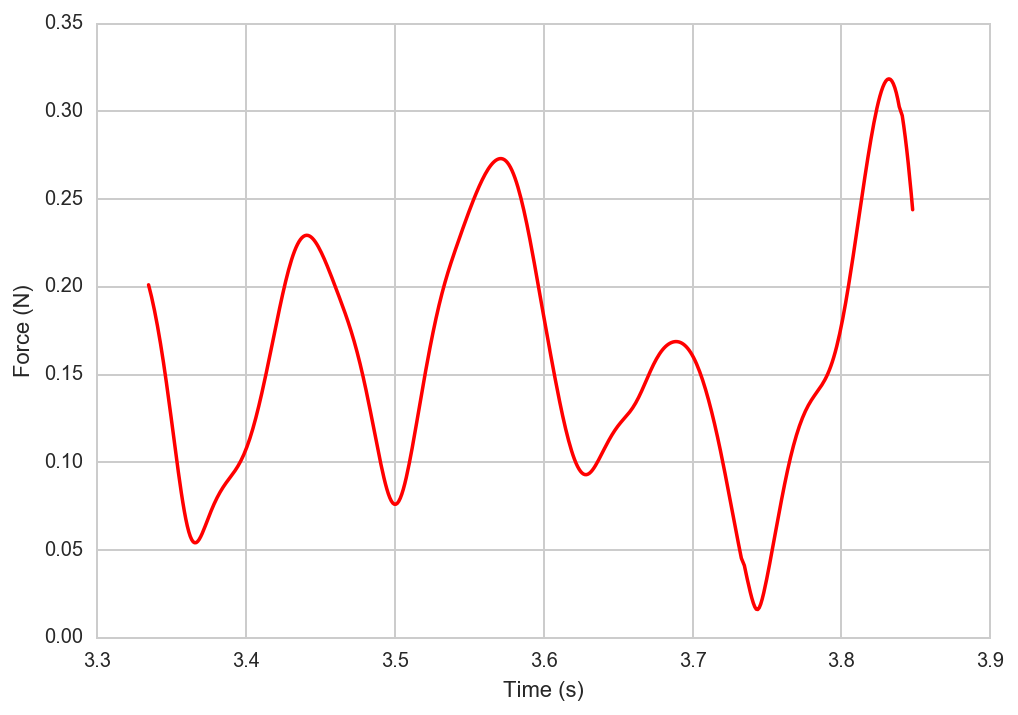

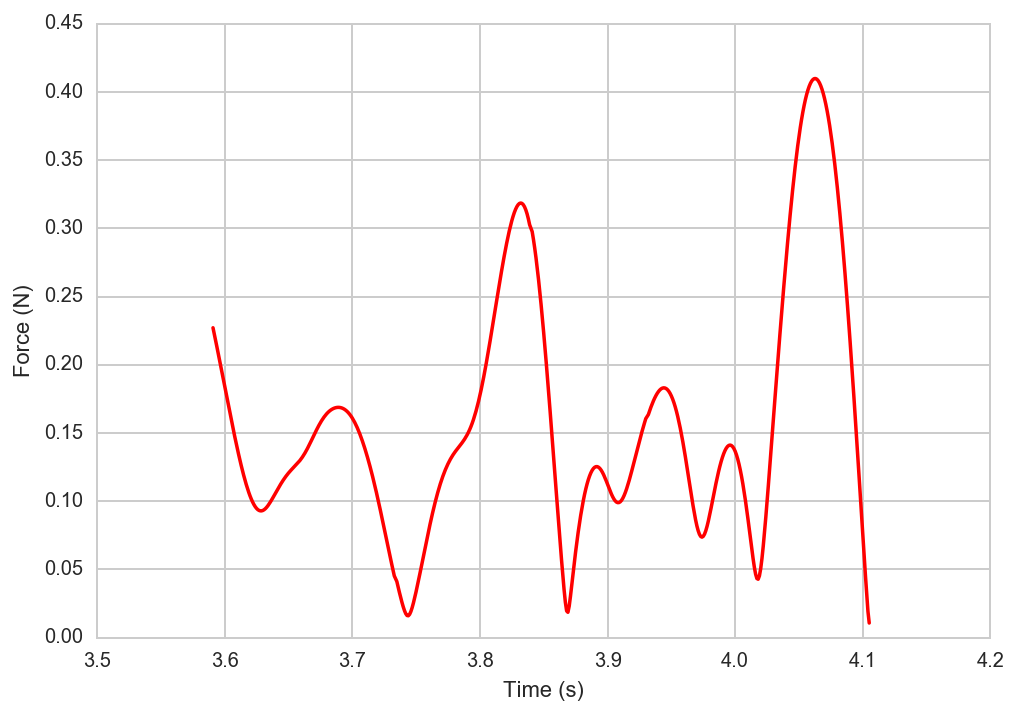

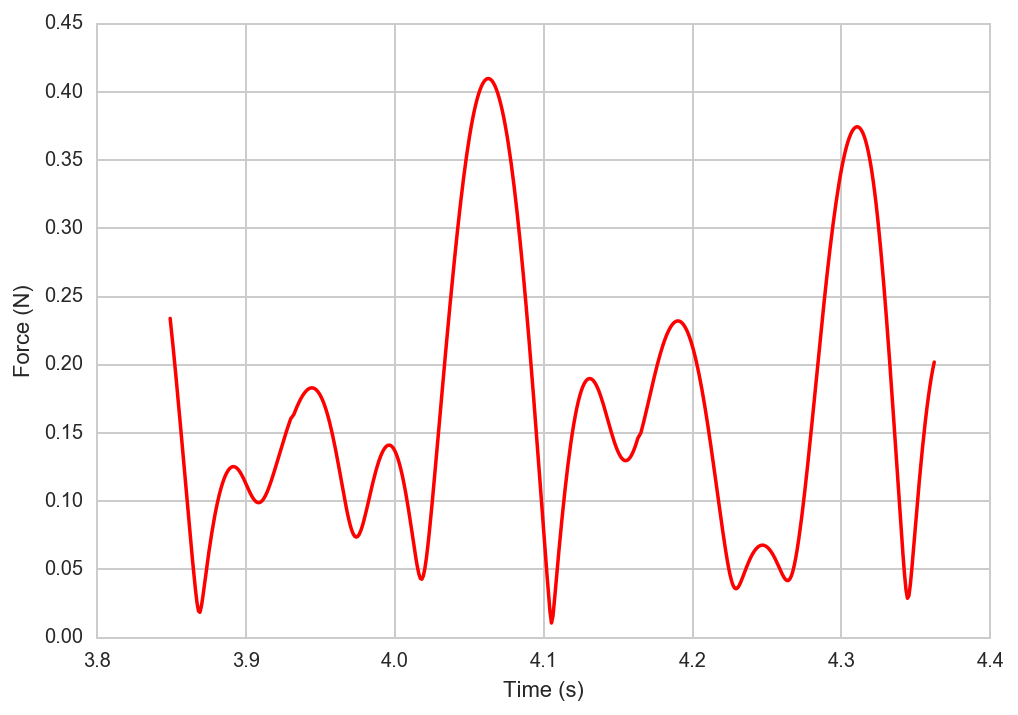

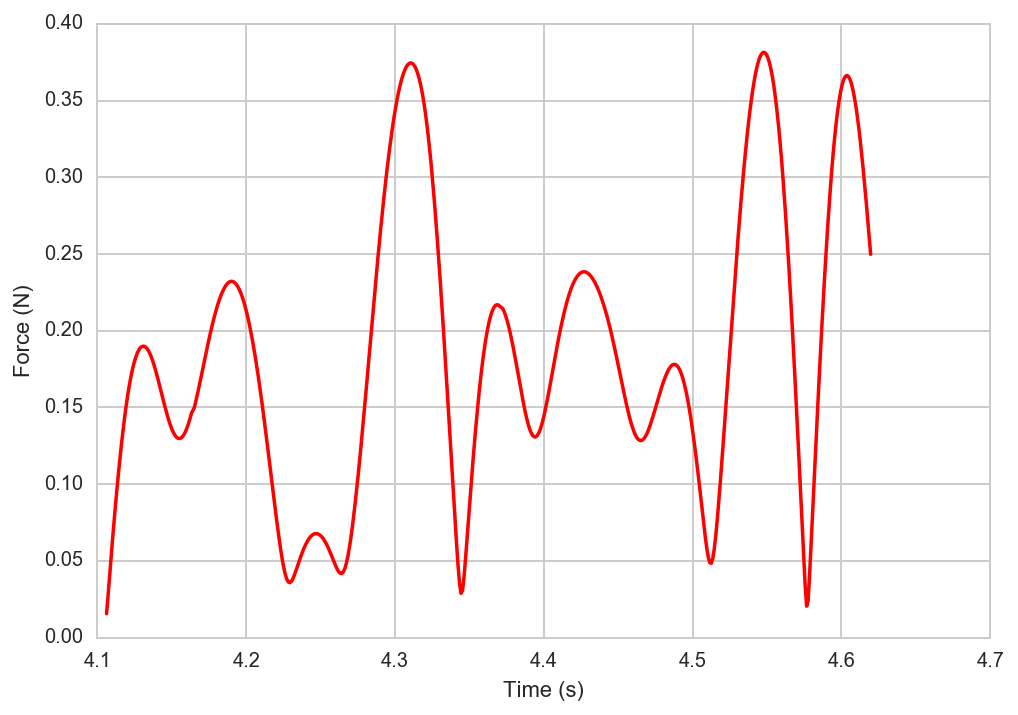

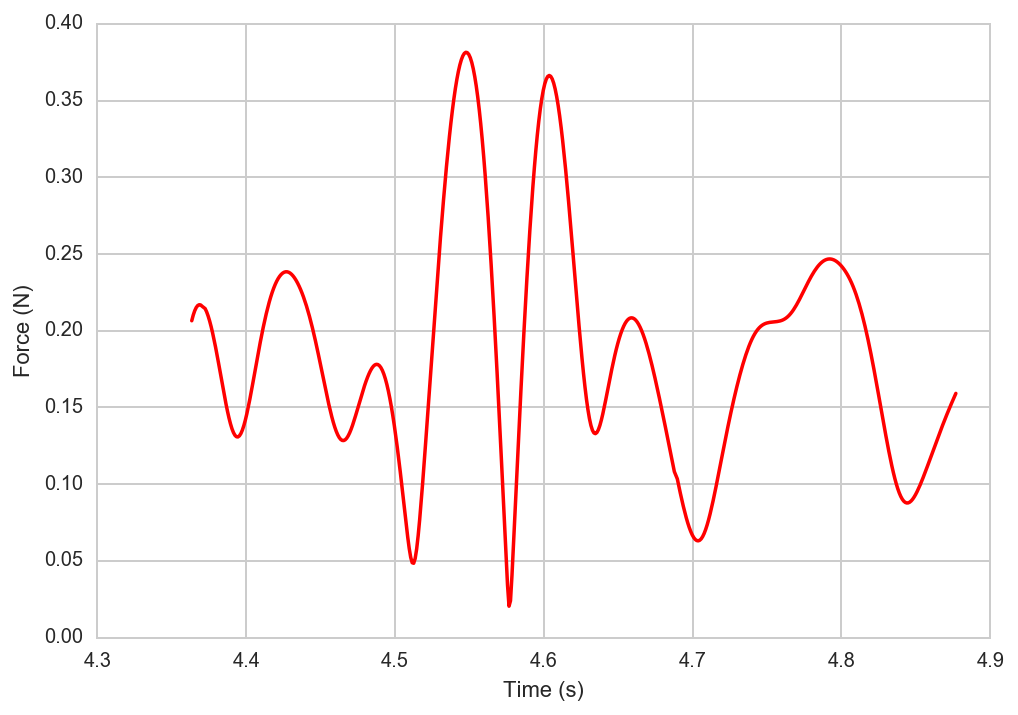

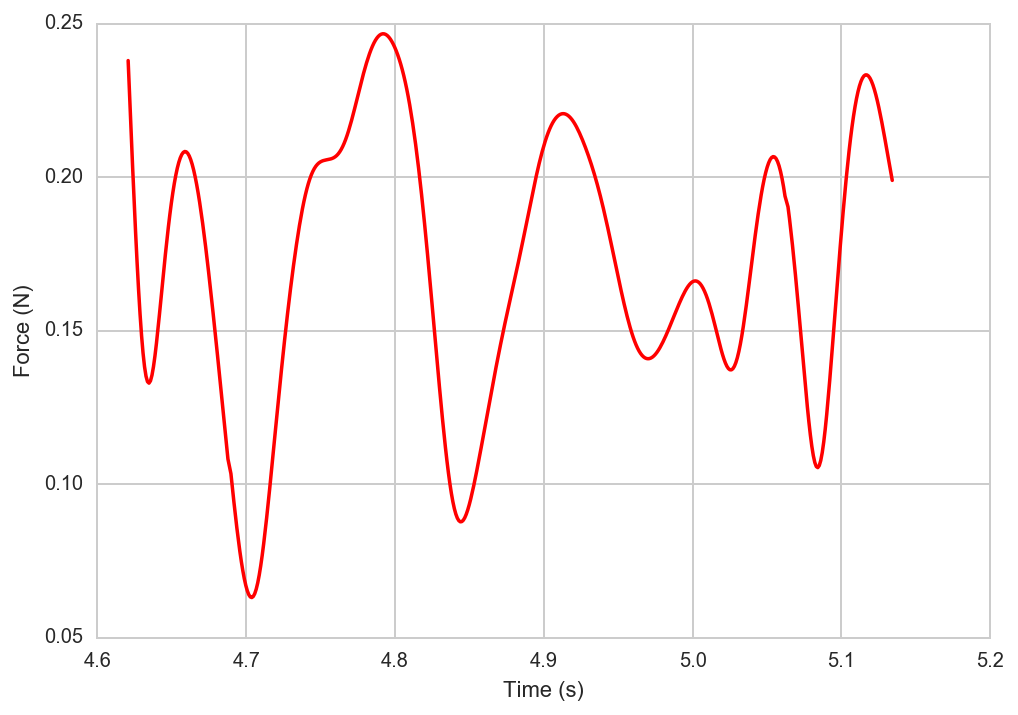

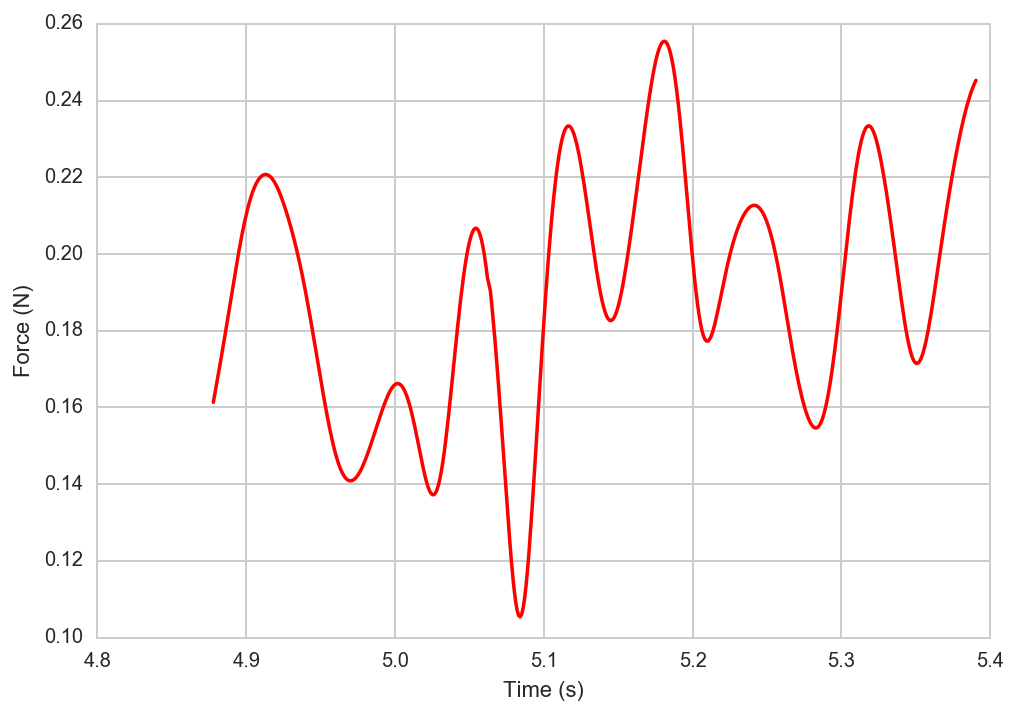

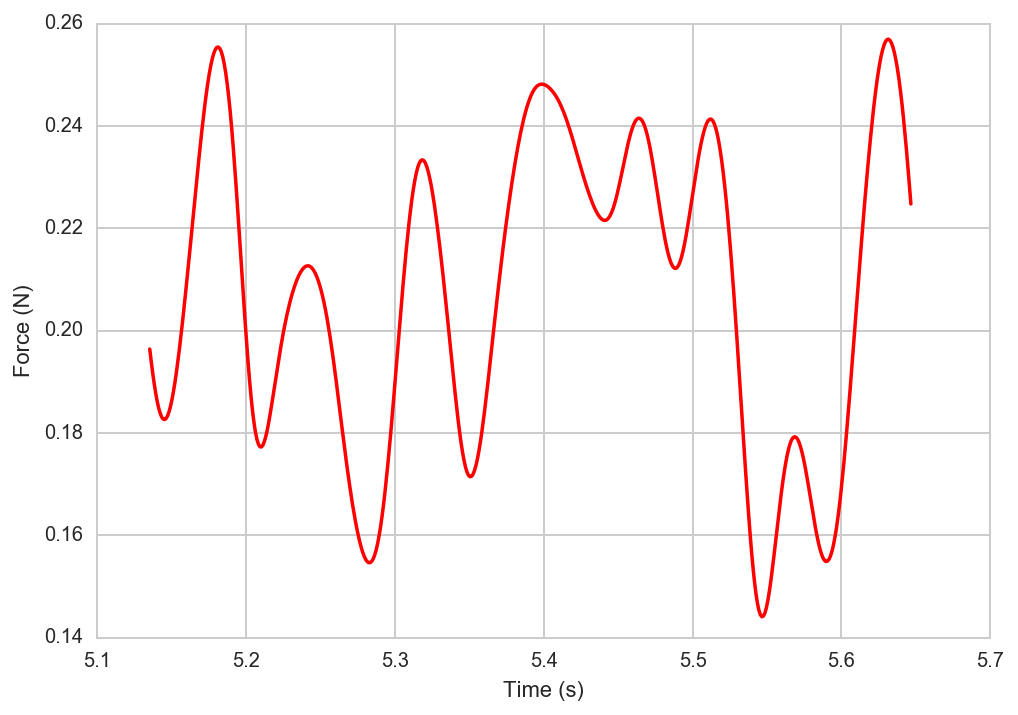

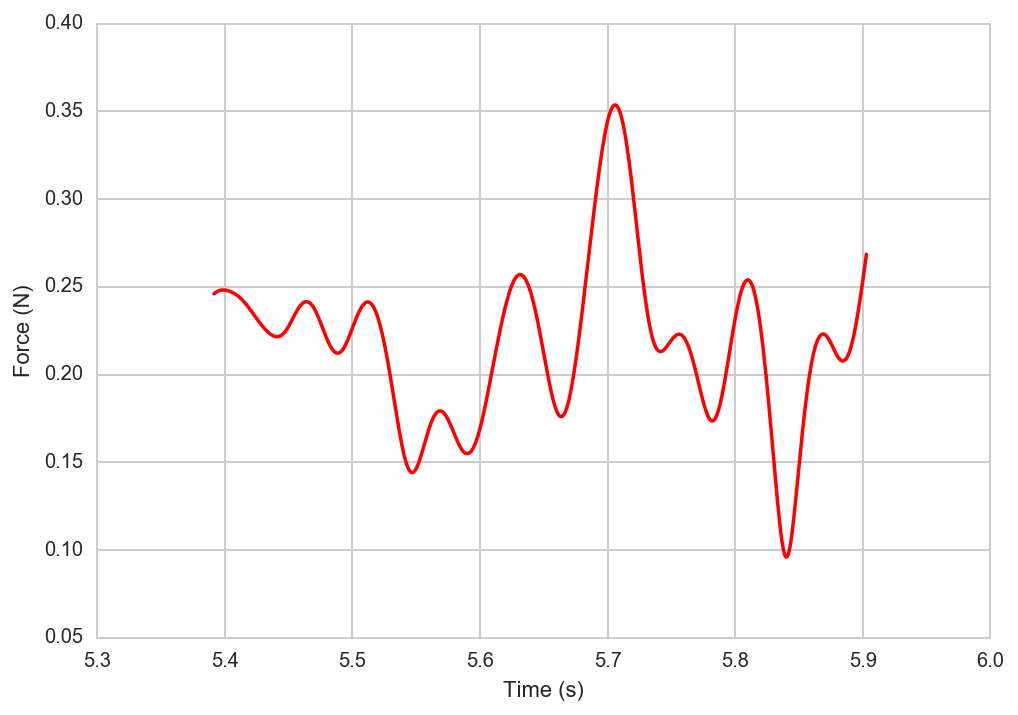

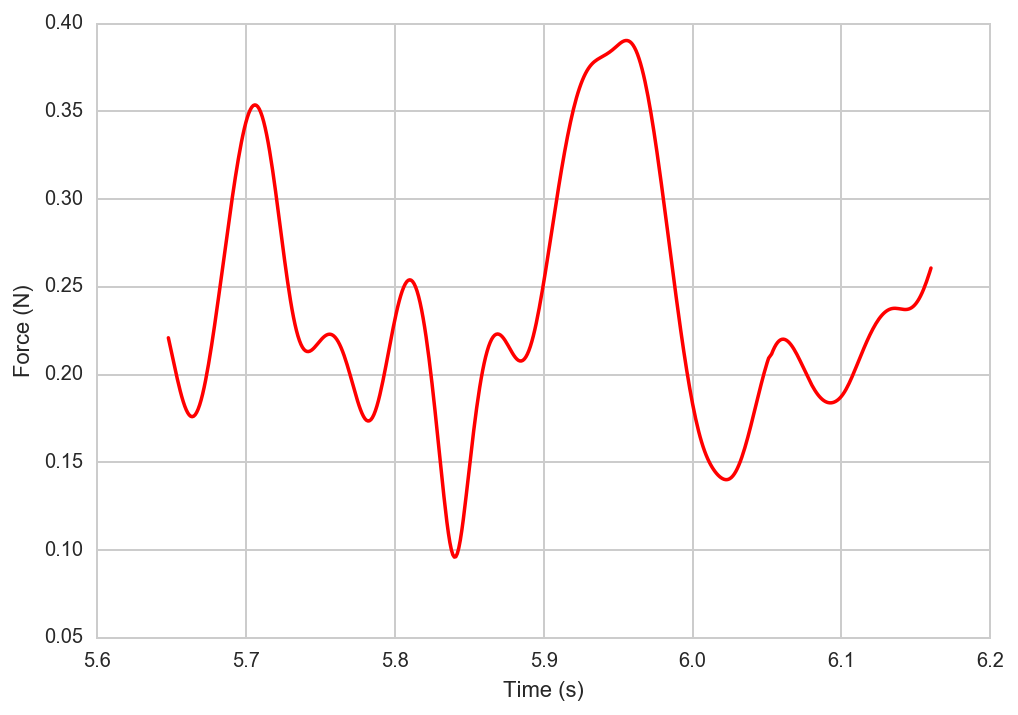

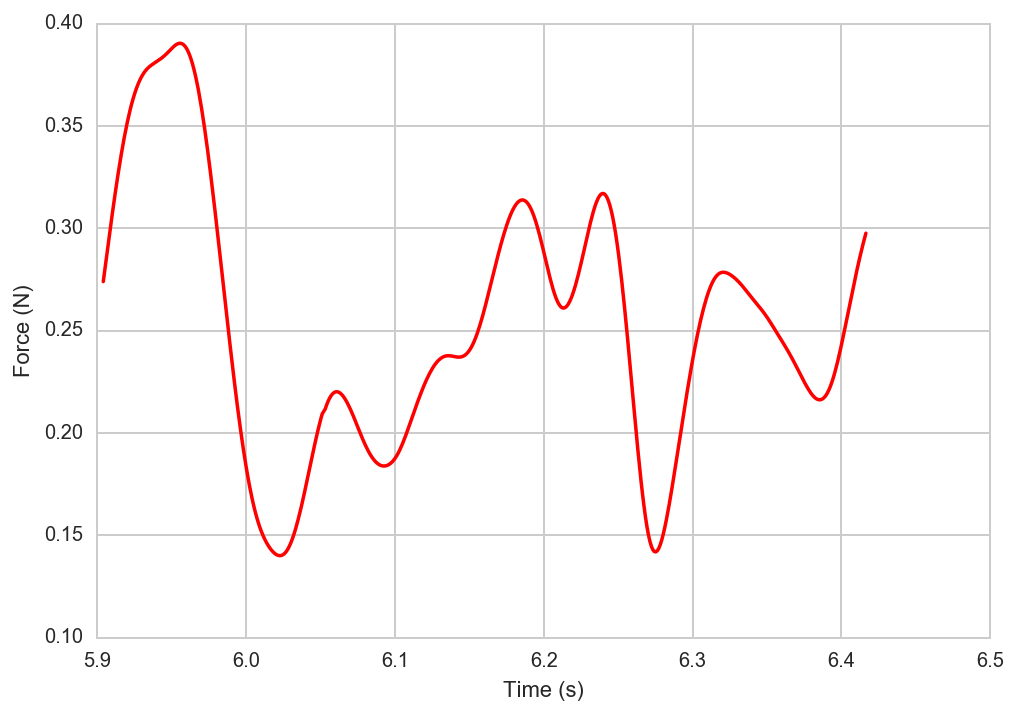

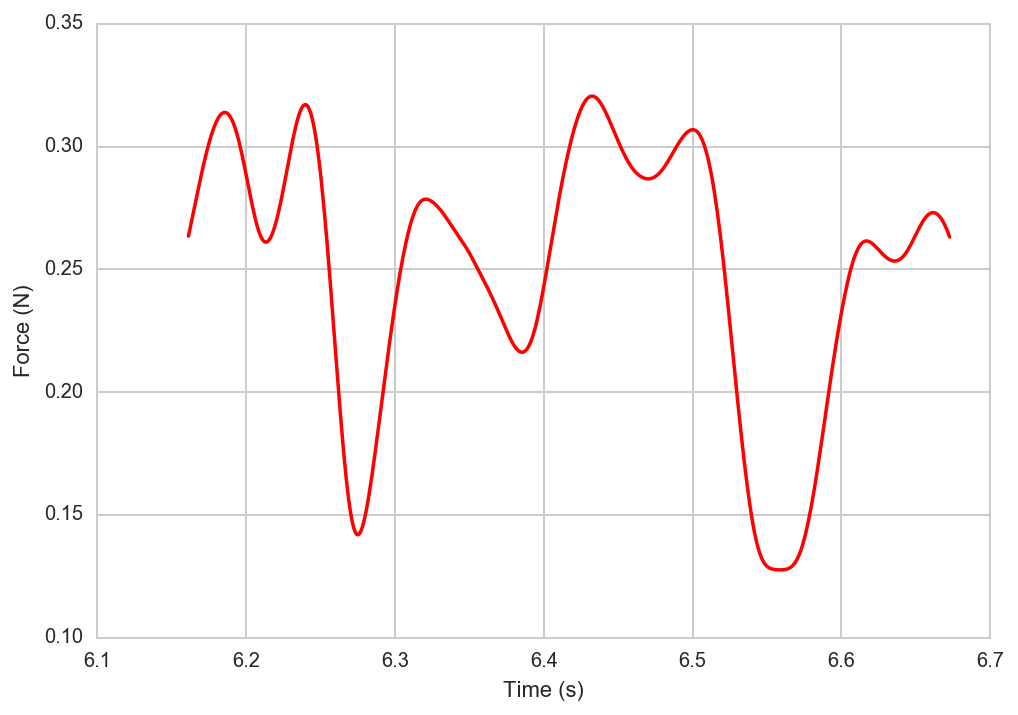

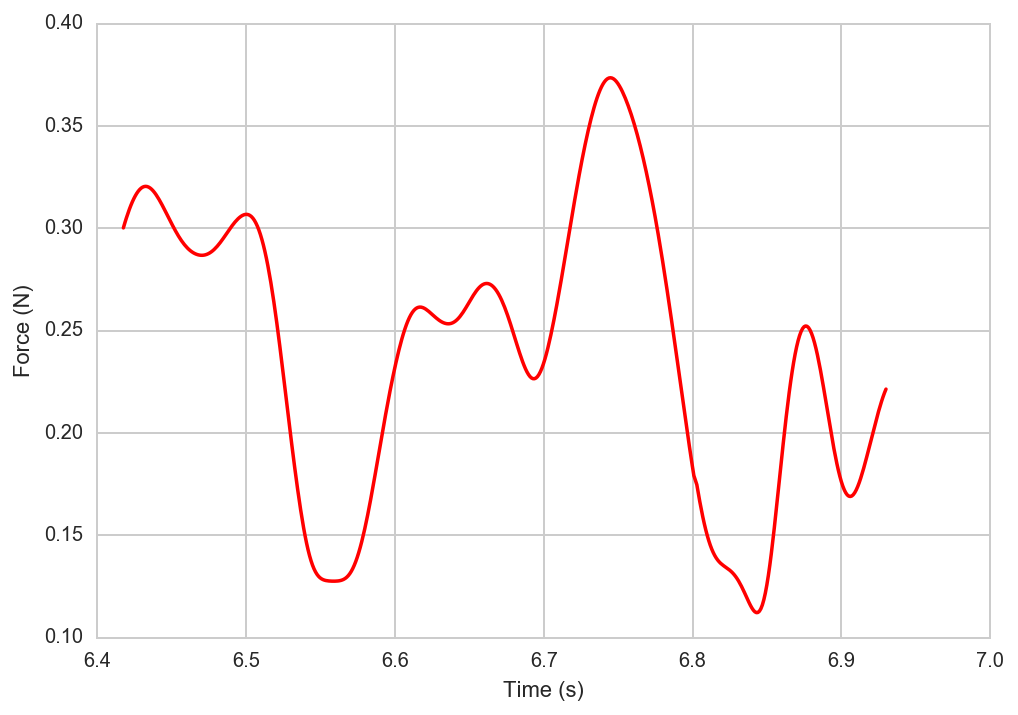

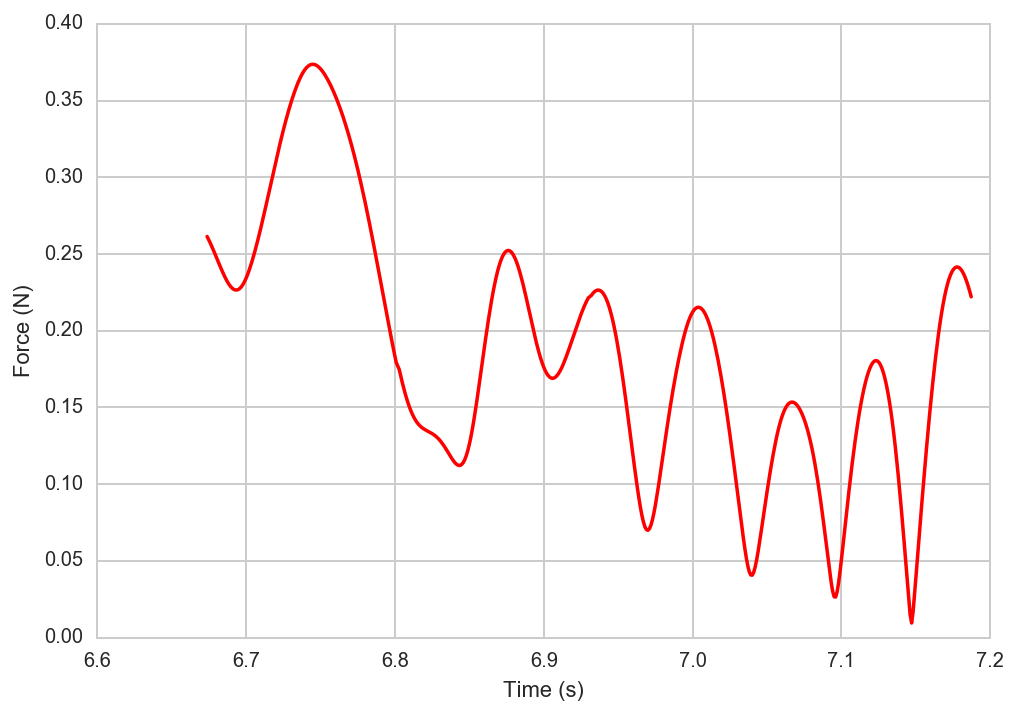

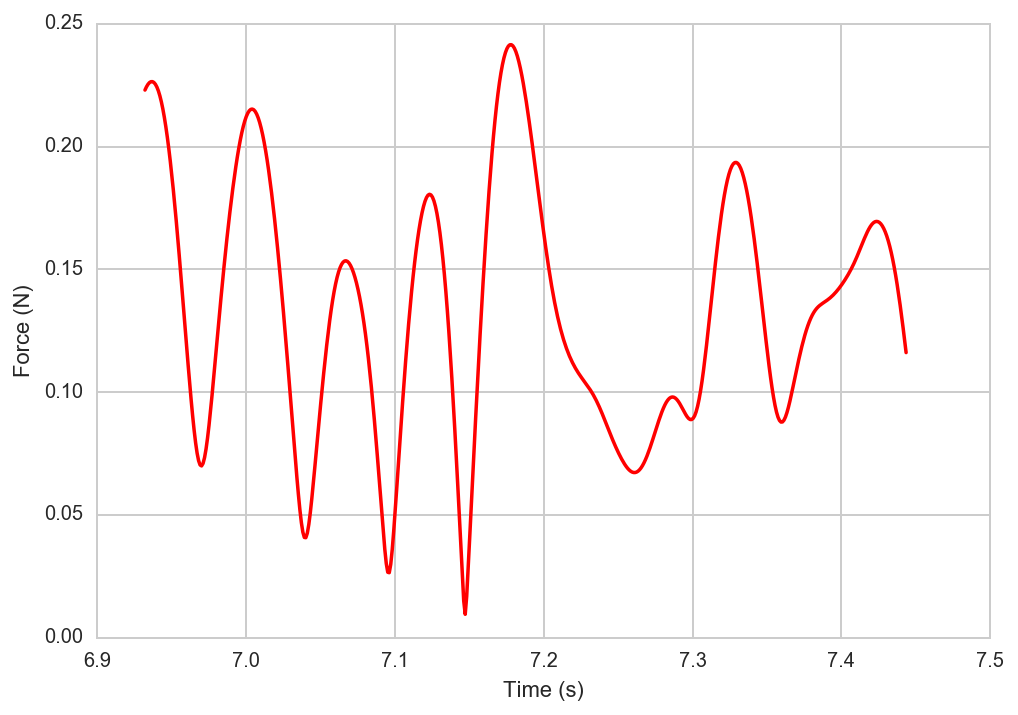

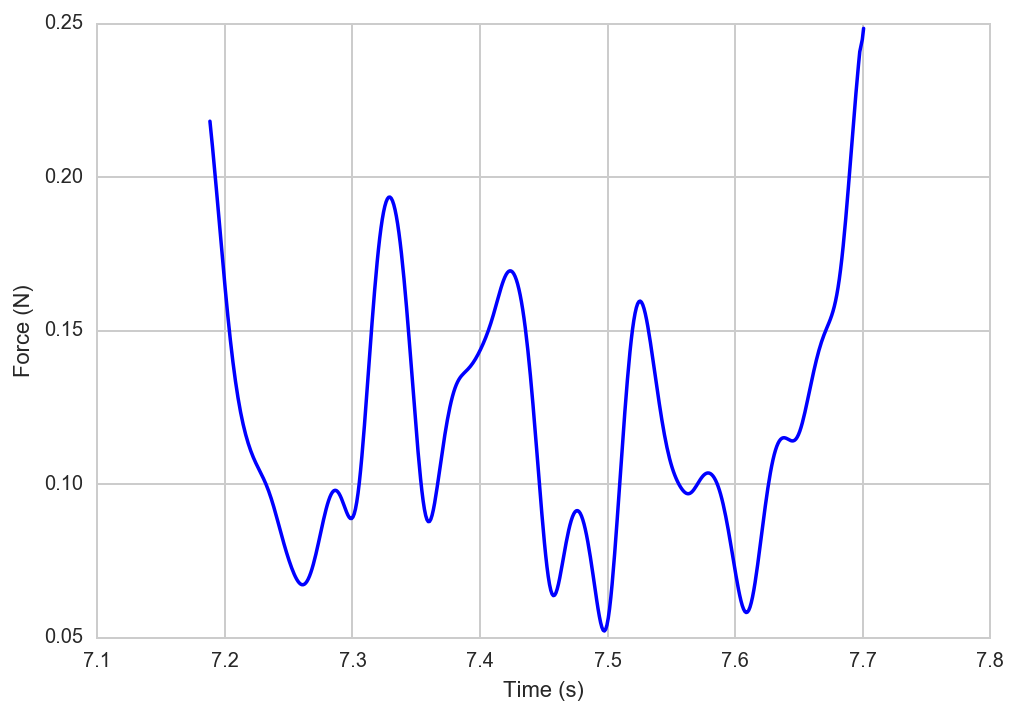

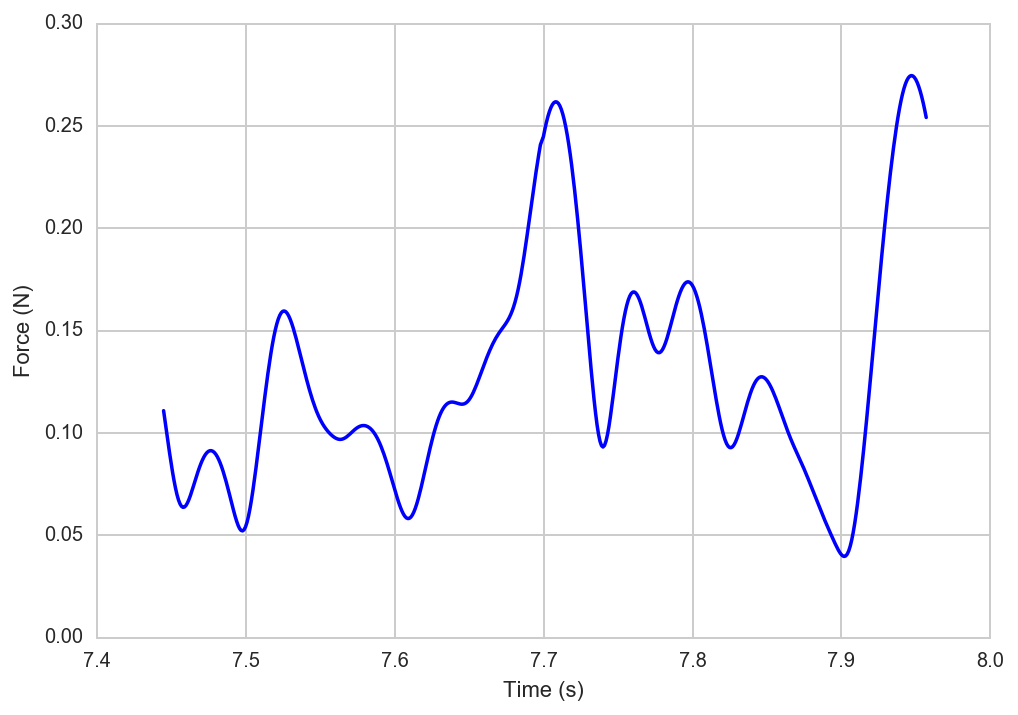

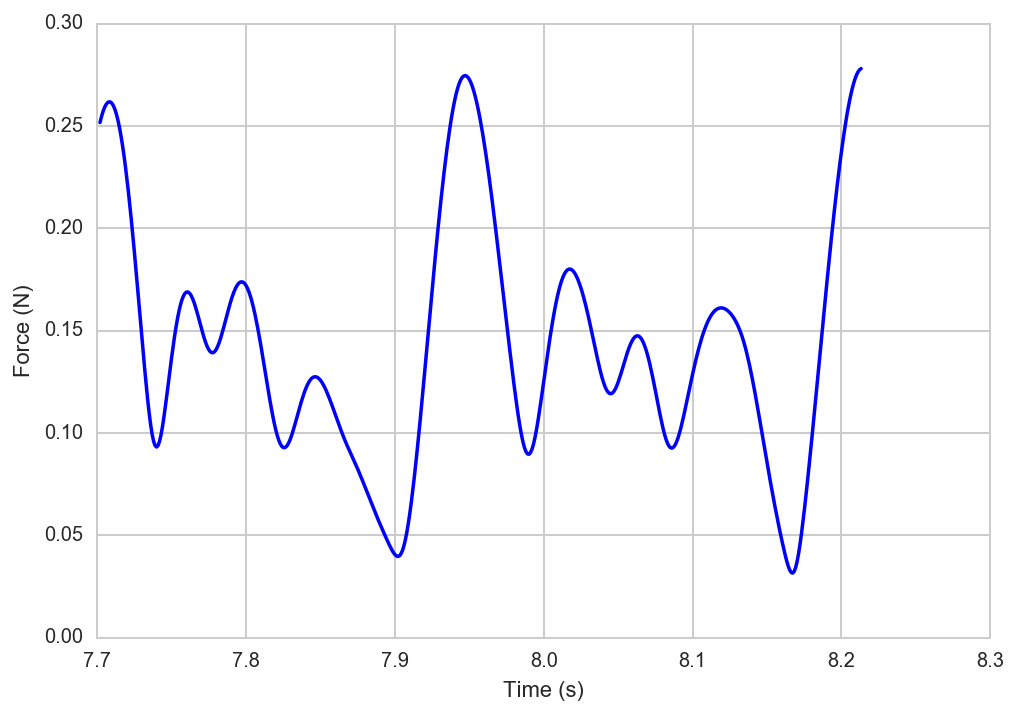

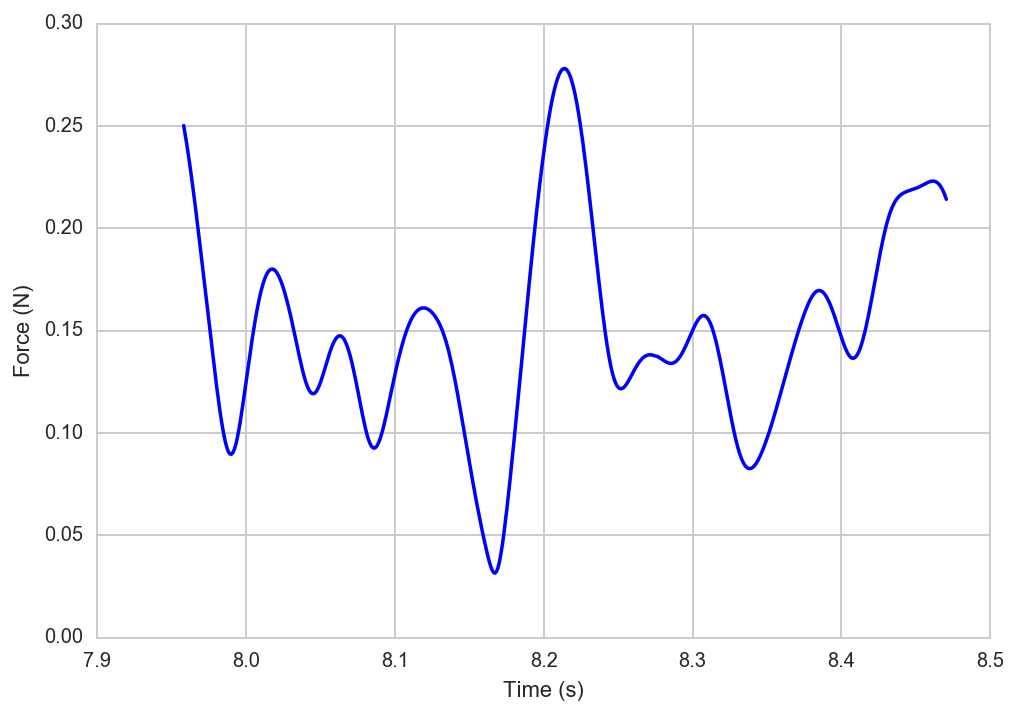

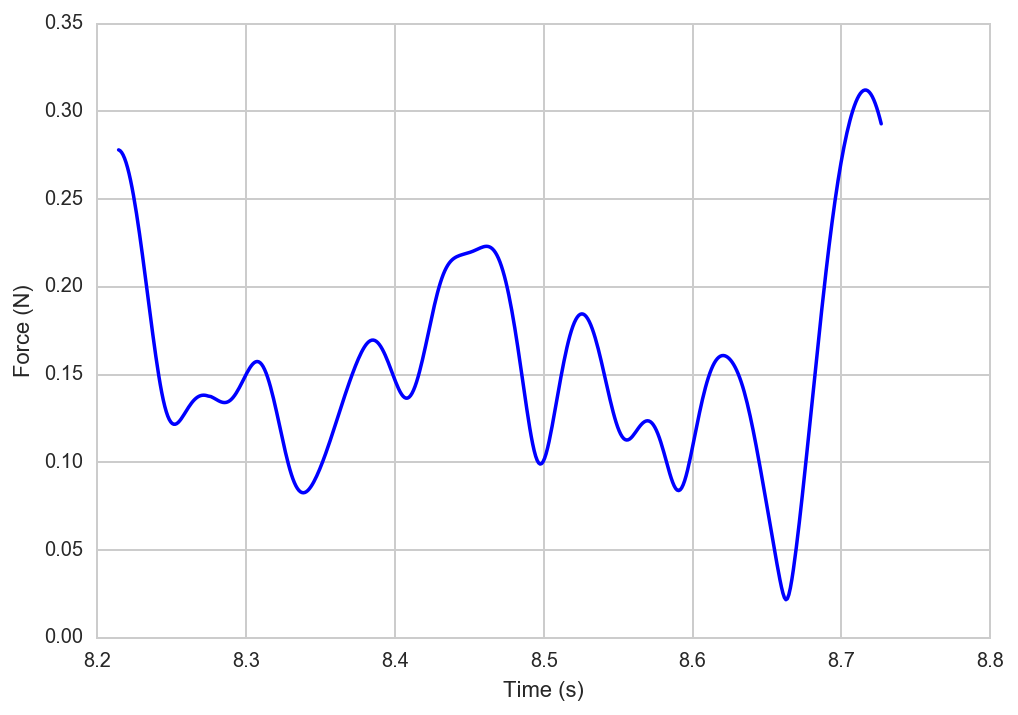

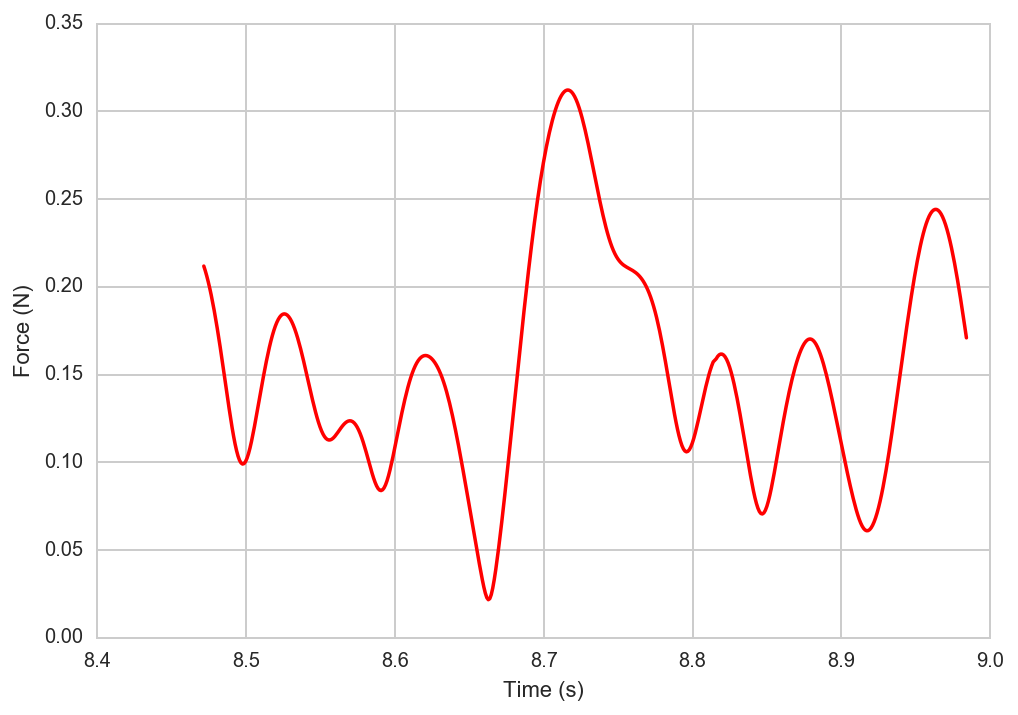

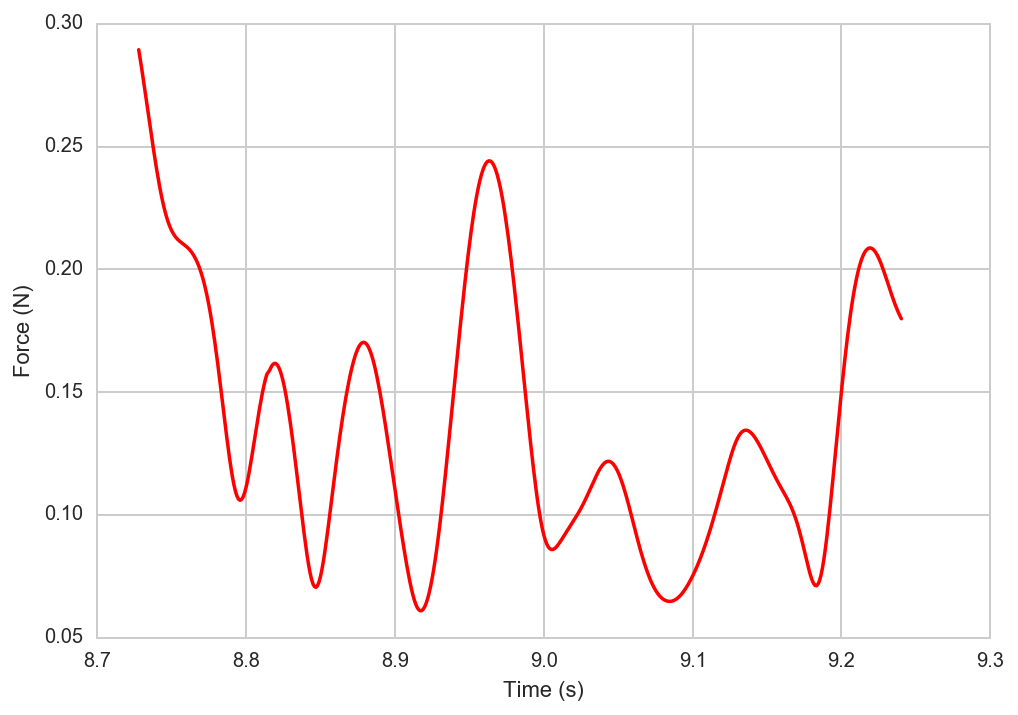

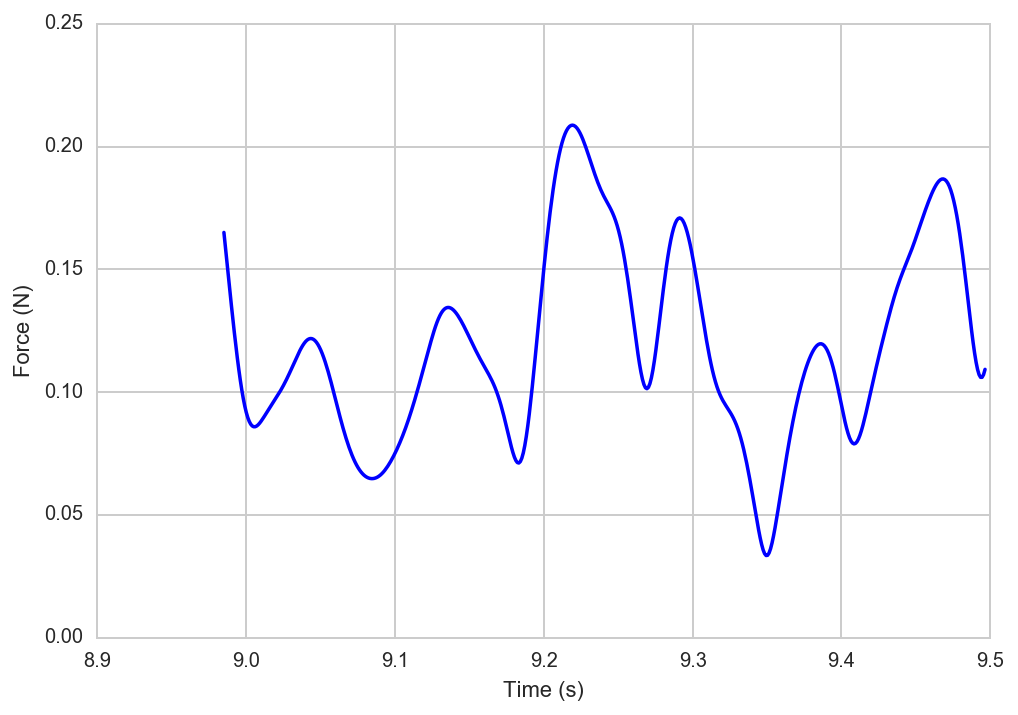

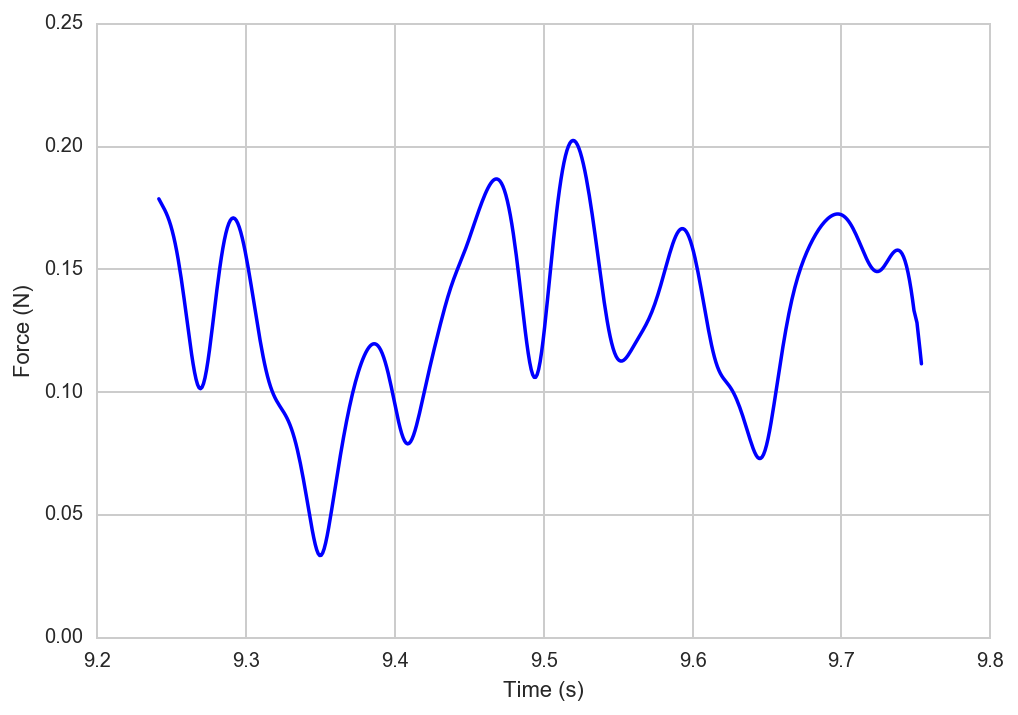

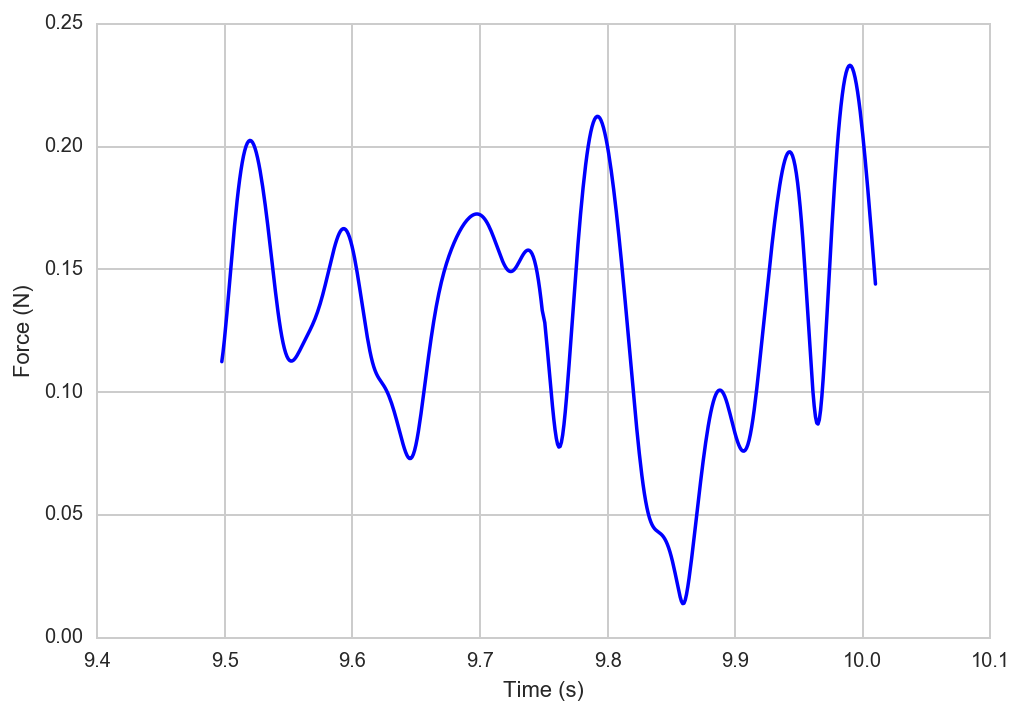

In [6]:
cdict = {
  'red'  :  [],
  'blue' :  []
}

for i in xrange(len(df_segs)):
    time_min = 
    color = 'b'
    if random_forest_predictions[i] == 1:
        color = 'r'
        
    plt.plot(df_segs[i]["time"], df_segs[i]["F_mag"],color=color)
    plt.xlabel("Time (s)")
    plt.ylabel("Force (N)")
    plt.show()

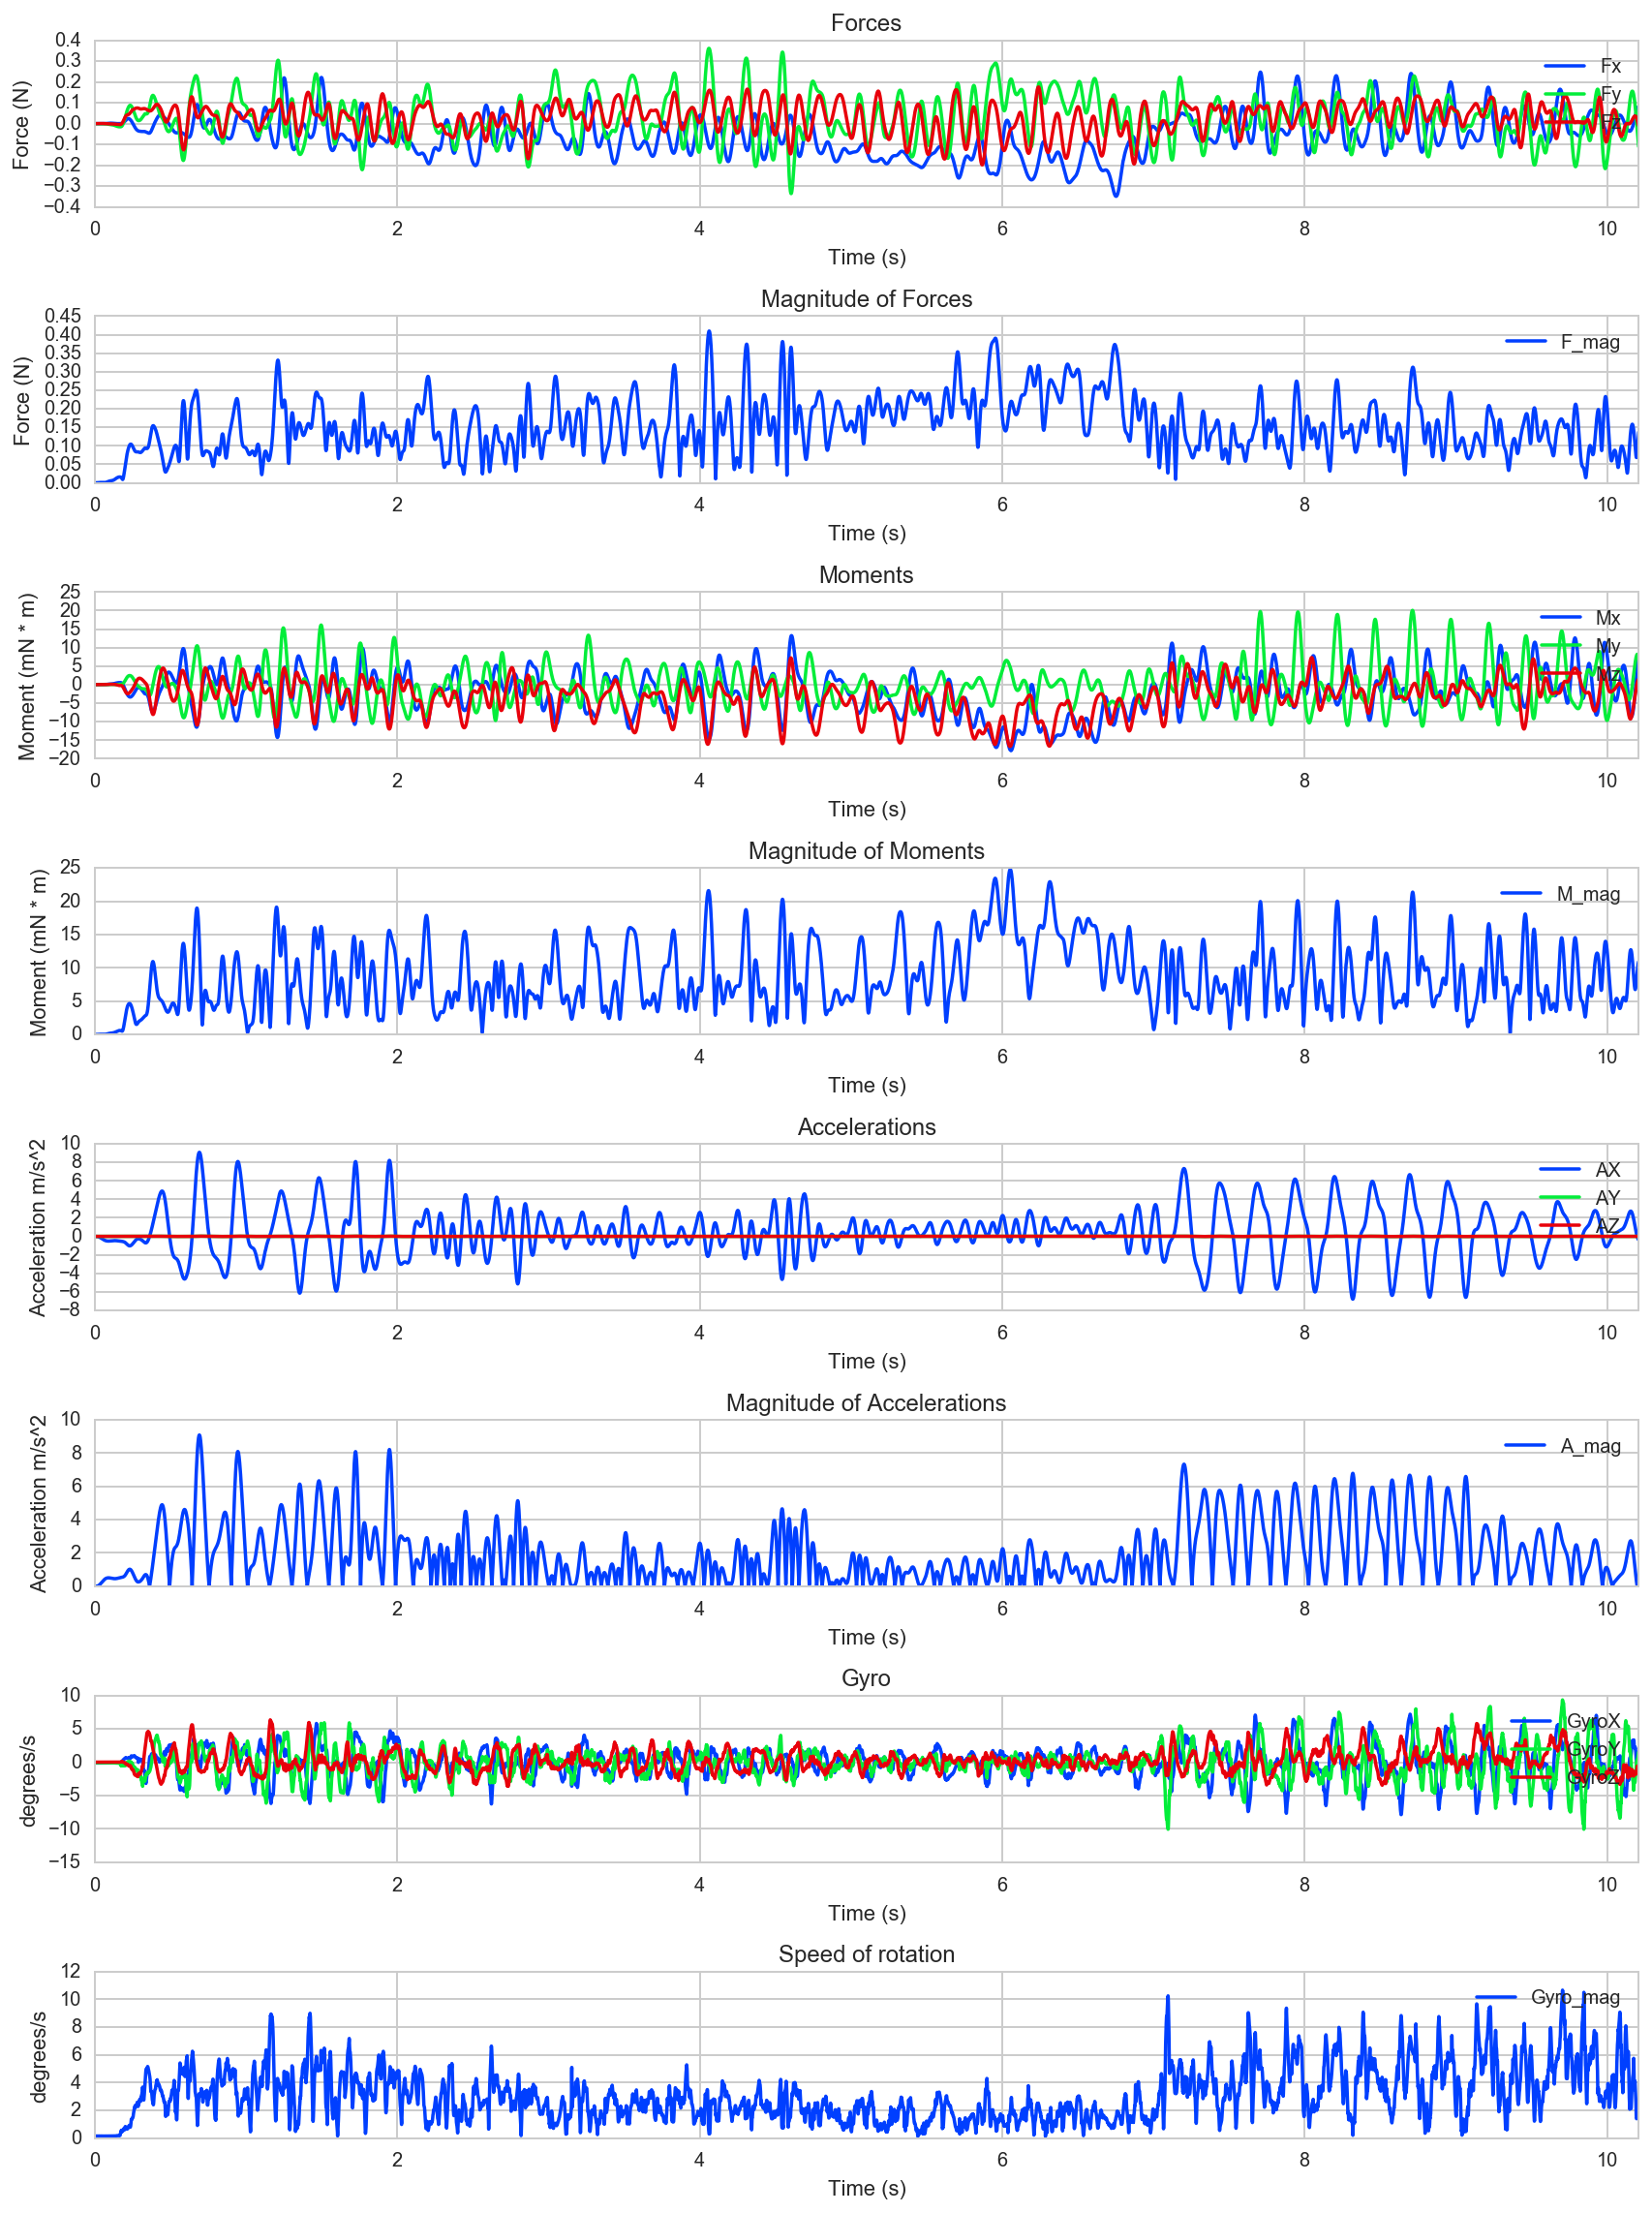

In [7]:
utils.plot_columns(df, [["Fx", "Fy", "Fz"], "F_mag", ["Mx", "My", "Mz"], "M_mag", ["AX", "AY", "AZ"], "A_mag", ["GyroX", "GyroY", "GyroZ"], "Gyro_mag"], display=True, save_figure=False, output_filename="FMAG.png")



In [7]:
# XGB Predictions

xgb_predictions = classify.predict_xgb_trees(test_data)


Running XGB Trees...
CTL size: 117 ACT size: 99
10-fold CV Acc Mean:  0.934805194805 Scores:  [ 0.95454545  0.86363636  0.90909091  0.95454545  0.90909091  1.          1.
  0.95238095  0.9047619   0.9       ]
Feature Importances:
[('Mz_skew', 0.00050819544177272899), ('Mx_skew', 0.00054760524810346849), ('AX_min', 0.00057041906778709957), ('Fz_max', 0.00059649183711554213), ('Fz_skew', 0.00071694280118968418), ('Fy_kurtosis', 0.0008241512232808726), ('Fy_energy', 0.0013632687122387269), ('Fx_energy', 0.0023003919012869857), ('Fz_entropy', 0.0031266746527040578), ('Fy_std', 0.0034627323260885009), ('Mz_energy', 0.003806163406301956), ('My_entropy', 0.0039370399190784772), ('Fy_max', 0.0042944675712108917), ('Fx_std', 0.0044617835180749193), ('Fz_kurtosis', 0.005020464981252558), ('My_mean', 0.0051462141644236558), ('F_mag_kurtosis', 0.0053647963572625154), ('M_mag_std', 0.0056490690169042016), ('AX_mean', 0.0059100266436203971), ('My_kurtosis', 0.0059738491567607266), ('My_skew', 0.006

In [5]:
# SVC Predictions

svc_predictions = classify.predict_svc(test_data)



Running SVC...
CTL size: 117 ACT size: 99
10-fold CV Acc Mean:  0.939805194805 Scores:  [ 1.          0.90909091  1.          0.95454545  0.90909091  0.95454545
  0.86363636  0.95238095  0.9047619   0.95      ]
predicted labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [12]:
# dnn predictions
test_data = np.array(test_data)
print test_data.shape
dnn_predictions = classify.predict_dnn(test_data)

(38, 70)

Running Neural Network...
CTL size: 117 ACT size: 99
Step #1, avg. loss: 0.97720
Step #101, epoch #50, avg. loss: 0.11603
Step #201, epoch #100, avg. loss: 0.01916
Step #301, epoch #150, avg. loss: 0.00727
Step #401, epoch #200, avg. loss: 0.00390
Step #501, epoch #250, avg. loss: 0.00251
Step #601, epoch #300, avg. loss: 0.00180
Step #701, epoch #350, avg. loss: 0.00139
Step #801, epoch #400, avg. loss: 0.00111
Step #901, epoch #450, avg. loss: 0.00092
Step #1, avg. loss: 1.01780
Step #101, epoch #50, avg. loss: 0.11223
Step #201, epoch #100, avg. loss: 0.01745
Step #301, epoch #150, avg. loss: 0.00675
Step #401, epoch #200, avg. loss: 0.00371
Step #501, epoch #250, avg. loss: 0.00242
Step #601, epoch #300, avg. loss: 0.00176
Step #701, epoch #350, avg. loss: 0.00135
Step #801, epoch #400, avg. loss: 0.00108
Step #901, epoch #450, avg. loss: 0.00090
Step #1, avg. loss: 1.01889
Step #101, epoch #50, avg. loss: 0.11934
Step #201, epoch #100, avg. loss: 0.01798
Step #301, epoch

In [ ]:
[1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0]


[1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0]

[1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0]